## Coranvirus_Analysis

In [31]:

## donwloading via google sheets

#export google sheet to csv and download
#original data source https://systems.jhu.edu/research/public-health/ncov/

#import requests as rs


#original url for downloading csv
#csv_url='http://spreadsheets.google.com/ccc?key=1UF2pSkFTURko2OvfHWWlFpDFAr1UxCBA4JLwlSP6KFo&output=csv'

# source for formatting gs sheet request http://googlesystem.blogspot.com/2007/07/download-published-documents-and.html
# actual gs sheet source http://spreadsheets.google.com/ccc?key=1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM&output=xls
#res=rs.get(url=csv_url)
#open('coronavirus_stats_conf.csv', 'wb').write(res.content)



#read_conf = pd.read_csv('/Users/neil.watt/Documents/PythonScripts/Coronavirus/coronavirus_stats_conf.csv', encoding = "ISO-8859-1")

#replace blank province/state with nil
#read_conf['Province/State'].fillna('', inplace=True)

#replace all other NaNs with 0
#read_conf.fillna(0, inplace=True)

#create new name key column
#read_conf.insert(1, 'name', read_conf["Province/State"].map(str) +' '+ read_conf["Country/Region"])


## Import, clean and format confirmed Cases

In [32]:

#import confirmed cases data
#github https://github.com/CSSEGISandData/2019-nCoV

import pandas as pd
import numpy as np
import requests as rs
import pandas as pd

csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/2019-nCoV/master/time_series/time_series_2019-ncov-Confirmed.csv'
res=rs.get(url=csv_url)
open('coronavirus_stats_conf2.csv', 'wb').write(res.content)

read_conf = pd.read_csv('/Users/neil.watt/Documents/PythonScripts/Coronavirus/coronavirus_stats_conf2.csv', encoding = "ISO-8859-1")

#read_conf = pd.read_csv('/Users/neilwatt/Documents/Projects/Coronavirus/Coronavirus_Analysis/coronavirus_stats_conf2.csv', encoding = "ISO-8859-1")
#replace blank province/state with nil
read_conf['Province/State'].fillna('', inplace=True)

#replace all other NaNs with 0
read_conf.fillna(0, inplace=True)

#create new name key column
read_conf.insert(1, 'name', read_conf["Province/State"].map(str) +' '+ read_conf["Country/Region"])



In [33]:


#slice confirmed cases into two dfs in order to recombine transpose of the cases table with the regions

read_conf_copy=read_conf.copy()

#this creayes a dataframe which is a slice with just the city rows (which will be replciated for each date)

#new_city=read_conf_copy.iloc[:,0:6]

new_city=read_conf_copy.iloc[:,0:5]
read_conf_copy=read_conf.copy()

#this slices the date columns from the original

#new_df2=read_conf_copy.iloc[:,6:]
new_df2=read_conf_copy.iloc[:,5:]



#transpose date and cases columnes
new_df2_T=new_df2.T


#number cities
i_points=len(read_conf.index)

#new_df2_T_1=new_df2_T.iloc[:,0:1]
new_df2_T['Date'] = new_df2_T.index

d = {}
for i in range (0,i_points):
    d[i]=new_df2_T.iloc[:,i].to_frame()
    d[i].rename(columns={ d[i].columns[0]: "Cases" }, inplace = True)
    d[i]['Date'] = d[i].index
    
   


In [34]:

#recombine dataframes

dfs={}
for i in range (0,i_points):


#match with df1 based on column header
    city_row=new_city.loc[i,:].to_frame()
    city_row_T=city_row.T

#needs to be repeated same number of times as date columns
    n_times=len(d[i].index)
    city_row_T2=pd.concat([city_row_T]*n_times)


    d[i]['tmp'] = 1
    city_row_T2['tmp'] = 1

    dfs[i] = pd.merge(city_row_T2,d[i], on=['tmp'])
    dfs[i] = dfs[i].drop('tmp', axis=1)
    dfs[i]= dfs[i].drop_duplicates(subset='Date')
#df3a=df3.drop_duplicates(subset='Date')






In [35]:


#append dataframes into master format
from datetime import datetime


final_df = pd.concat(dfs, ignore_index=True)
#in order to model number of days from onset, convert to datetime
final_df['Date_proper'] = pd.to_datetime(final_df['Date'])

#Create new days column based on number of days from first row
final_df['Day']=((final_df['Date_proper']-final_df['Date_proper'].iloc[0]).dt.total_seconds())/(24*60*60)+1


final_df.to_csv(r'Coronavirus_cases_cleaned.csv')

In [36]:

#exlcude Mainland China cases for international cases
final_df_international=final_df[final_df['Country/Region']!='Mainland China']


#mainland china df
final_df_MChina=final_df[final_df['Country/Region']=='Mainland China']

#mainland exlcuding Hubei
final_df_MChina_exHubei=final_df_MChina[final_df_MChina['Province/State']!='Hubei']




## Import, clean and format deaths and recovereries

#### import deaths

In [37]:
#import dead 

dead_url = 'https://raw.githubusercontent.com/CSSEGISandData/2019-nCoV/master/time_series/time_series_2019-ncov-Deaths.csv'
dead_res=rs.get(url=dead_url)
open('coronavirus_stats_dead.csv', 'wb').write(dead_res.content)




#read_dead = pd.read_csv('/Users/neilwatt/Documents/Projects/Coronavirus/Coronavirus_Analysis/coronavirus_stats_dead.csv', encoding = "ISO-8859-1")
read_dead = pd.read_csv('/Users/neil.watt/Documents/PythonScripts/Coronavirus/coronavirus_stats_dead.csv', encoding = "ISO-8859-1")
#replace blank province/state with nil
read_dead['Province/State'].fillna('', inplace=True)

#replace all other NaNs with 0
read_dead.fillna(0, inplace=True)

#create new name key column
read_dead.insert(1, 'name', read_dead["Province/State"].map(str) +' '+ read_dead["Country/Region"])

#### import recovered

In [38]:
#import recovered

rec_url = 'https://raw.githubusercontent.com/CSSEGISandData/2019-nCoV/master/time_series/time_series_2019-ncov-Recovered.csv'
rec_res=rs.get(url=rec_url)
open('coronavirus_stats_rec.csv', 'wb').write(rec_res.content)


#read_rec = pd.read_csv('/Users/neilwatt/Documents/Projects/Coronavirus/Coronavirus_Analysis/coronavirus_stats_rec.csv', encoding = "ISO-8859-1")

read_rec = pd.read_csv('/Users/neil.watt/Documents/PythonScripts/Coronavirus/coronavirus_stats_rec.csv', encoding = "ISO-8859-1")

#replace blank province/state with nil
read_rec['Province/State'].fillna('', inplace=True)

#replace all other NaNs with 0
read_rec.fillna(0, inplace=True)

#create new name key column
read_rec.insert(1, 'name', read_rec["Province/State"].map(str) +' '+ read_rec["Country/Region"])


#### format dead

In [39]:
#slice dead cases into two dfs in order to recombine transpose of the cases table with the regions

read_dead_copy=read_dead.copy()

#this creayes a dataframe which is a slice with just the city rows (which will be replciated for each date)
new_city_dead=read_dead_copy.iloc[:,0:5]
read_dead_copy=read_dead.copy()

#this slices the date columns from the original
new_df2_dead=read_dead_copy.iloc[:,5:]

#transpose date and cases columnes
new_df2_T_dead=new_df2_dead.T


#number cities
i_points_dead=len(read_dead.index)

#new_df2_T_1=new_df2_T.iloc[:,0:1]
new_df2_T_dead['Date'] = new_df2_T_dead.index

d_dead = {}
for i in range (0,i_points):
    d_dead[i]=new_df2_T_dead.iloc[:,i].to_frame()
    d_dead[i].rename(columns={ d_dead[i].columns[0]: "Cases" }, inplace = True)
    d_dead[i]['Date'] = d_dead[i].index
    

In [40]:
#recombine dataframes (deaths)

dfs_dead={}
for i in range (0,i_points_dead):


#match with df1 based on column header
    city_row_dead=new_city_dead.loc[i,:].to_frame()
    city_row_T_dead=city_row_dead.T

#needs to be repeated same number of times as date columns
    n_times_dead=len(d_dead[i].index)
    city_row_T2_dead=pd.concat([city_row_T_dead]*n_times_dead)


    d_dead[i]['tmp'] = 1
    city_row_T2_dead['tmp'] = 1

    dfs_dead[i] = pd.merge(city_row_T2_dead,d_dead[i], on=['tmp'])
    dfs_dead[i] = dfs_dead[i].drop('tmp', axis=1)
    dfs_dead[i]= dfs_dead[i].drop_duplicates(subset='Date')
#df3a=df3.drop_duplicates(subset='Date')



In [41]:
#append dataframes into master format
from datetime import datetime


final_df_dead = pd.concat(dfs_dead, ignore_index=True)
#in order to model number of days from onset, convert to datetime
final_df_dead['Date_proper'] = pd.to_datetime(final_df_dead['Date'])

#Create new days column based on number of days from first row
final_df_dead['Day']=((final_df_dead['Date_proper']-final_df_dead['Date_proper'].iloc[0]).dt.total_seconds())/(24*60*60)+1


final_df_dead.to_csv(r'Coronavirus_cases_dead_cleaned.csv')

In [42]:
#exlcude Mainland China cases for international cases
final_df_dead_international=final_df_dead[final_df_dead['Country/Region']!='Mainland China']


#mainland china df
final_df_dead_MChina=final_df[final_df_dead['Country/Region']=='Mainland China']

#mainland exlcuding Hubei
final_df_dead_MChina_exHubei=final_df_dead_MChina[final_df_dead_MChina['Province/State']!='Hubei']

#hubei
final_df_dead_MChina_Hubei=final_df_dead_MChina[final_df_dead_MChina['Province/State']=='Hubei']

In [43]:
#### format recovered cases


## Plotting Cases by Geography

In [44]:
import  plotly.express as px
#https://plot.ly/python-api-reference/generated/plotly.express.scatter_geo.html
scale=0.1




fig = px.scatter_geo(final_df_MChina , lat="Lat",lon="Long",
                    color="Cases",
                    #size="Cases",
                     size_max=70,
                    size='Cases',
                     #size="Cases",
                     title="Coronavirus Cases by Day (Mainland China))",
                     
                   hover_name="name", 
                     #labels="name",
                    color_continuous_scale=px.colors.sequential.RdBu[::-1],
                     # color_continuous_scale=px.colors.sequential.Plasma,
                     #plotly.express.colors.diverging
                    animation_frame="Date"
                    
                    
                    )
fig.show()

In [45]:
#non Mainland China only

import  plotly.express as px
#https://plot.ly/python-api-reference/generated/plotly.express.scatter_geo.html




fig = px.scatter_geo(final_df_international , lat="Lat",lon="Long",
                    color="Cases",
                    #size="Cases",
                     size_max=30,
                    size='Cases',
                     #size="Cases",
                     title="Coronavirus Cases by Day (exl Mainland CN))",
                     
                   hover_name="name", 
                     #labels="name",
                    color_continuous_scale=px.colors.sequential.RdBu[::-1],
                     # color_continuous_scale=px.colors.sequential.Plasma,
                     #plotly.express.colors.diverging
                    animation_frame="Date"
                   
                    
                    
                    )
fig.show()

In [46]:



import plotly.express as px


fig = px.line(final_df_international,title="International Cases", x="Date", y="Cases", color="name", line_group="name", hover_name="name",render_mode="svg")
fig.for_each_trace(lambda t: t.update(name=t.name.replace("name=", "")))
fig.show()

In [47]:


#aggregate by country
#final_df_international
#final_df
#final_df_country=final_df.groupby('Country/Region')  




import plotly.express as px


fig = px.line(final_df_international,title="International Cases", x="Date", y="Cases", color="name", line_group="name", hover_name="name",render_mode="svg")
fig.for_each_trace(lambda t: t.update(name=t.name.replace("name=", "")))
fig.show()


In [48]:

import plotly.express as px


fig = px.line(final_df_MChina_exHubei,title="Mainland China Reported Coronavirus Cases (excl Hubei)", x="Date", y="Cases", color="name", line_group="name", hover_name="name",render_mode="svg")
fig.for_each_trace(lambda t: t.update(name=t.name.replace("name=", "")))
fig.show()

In [49]:

### adding top regions by number of cases for further analysis


#hubei
final_df_MChina_Hubei=final_df_MChina[final_df_MChina['Province/State']=='Hubei']

#Guangdong
final_df_MChina_Guangdong=final_df_MChina[final_df_MChina['Province/State']=='Guangdong']
#Zhejiang
final_df_MChina_Zhejiang=final_df_MChina[final_df_MChina['Province/State']=='Zhejiang']
#Henan
final_df_MChina_Henan=final_df_MChina[final_df_MChina['Province/State']=='Henan']

#Hunan
final_df_MChina_Hunan=final_df_MChina[final_df_MChina['Province/State']=='Hunan']

#Anhui
final_df_MChina_Anhui=final_df_MChina[final_df_MChina['Province/State']=='Anhui']


#Jiangxi
final_df_MChina_Jiangxi=final_df_MChina[final_df_MChina['Province/State']=='Jiangxi']





In [50]:



fig = px.line(final_df_MChina_Hubei,title="Hubei Coronavirus Cases", x="Date", y="Cases", color="name", line_group="name", hover_name="name",render_mode="svg")
fig.for_each_trace(lambda t: t.update(name=t.name.replace("name=", "")))
fig.show()

## Distribution of Cases

In [51]:
#define exponential function

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * np.exp(b * x) 



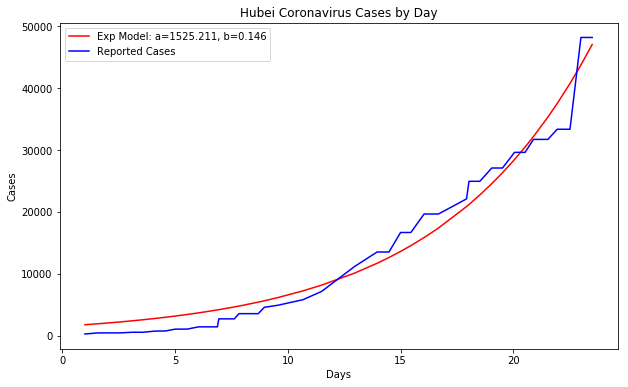

In [52]:
#conf range https://lmfit.github.io/lmfit-py/model.html

Cases=final_df_MChina_Hubei['Cases']
Days=final_df_MChina_Hubei['Day']

#empirical data
xdata = Days
y = Cases
ydata = y




popt, pcov = curve_fit(func, xdata, ydata)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(xdata, func(xdata, *popt), 'r-',label='Exp Model: a=%5.3f, b=%5.3f' % tuple(popt))
ax.plot(xdata, ydata, 'b-', label='Reported Cases')
plt.xlabel('Days')
plt.ylabel('Cases')
ax.set_title('Hubei Coronavirus Cases by Day')
ax.legend()

In [53]:
final_df_MChina_Hubei.head()

,Province/State,name,Country/Region,Lat,Long,Cases,Date,Date_proper,Day
516,Hubei,Hubei Mainland China,Mainland China,30.9756,112.271,270.0,1/21/20 22:00,2020-01-21 22:00:00,1.000000
517,Hubei,Hubei Mainland China,Mainland China,30.9756,112.271,444.0,1/22/20 12:00,2020-01-22 12:00:00,1.583333
518,Hubei,Hubei Mainland China,Mainland China,30.9756,112.271,444.0,1/23/20 12:00,2020-01-23 12:00:00,2.583333
519,Hubei,Hubei Mainland China,Mainland China,30.9756,112.271,549.0,1/24/20 0:00,2020-01-24 00:00:00,3.083333
520,Hubei,Hubei Mainland China,Mainland China,30.9756,112.271,549.0,1/24/20 12:00,2020-01-24 12:00:00,3.583333


## Forecasting Future Cases

In [54]:
 

final_df_MChina_Hubei['y']=final_df_MChina_Hubei['Cases']
final_df_MChina_Hubei['ds']=final_df_MChina_Hubei['Date']


#Guangdong
final_df_MChina_Guangdong['y']=final_df_MChina_Guangdong['Cases']
final_df_MChina_Guangdong['ds']=final_df_MChina_Guangdong['Date']

#Zhejiang
final_df_MChina_Zhejiang['y']=final_df_MChina_Zhejiang['Cases']
final_df_MChina_Zhejiang['ds']=final_df_MChina_Zhejiang['Date']

#Henan
final_df_MChina_Henan['y']=final_df_MChina_Henan['Cases']
final_df_MChina_Henan['ds']=final_df_MChina_Henan['Date']

#Hunan
final_df_MChina_Hunan['y']=final_df_MChina_Hunan['Cases']
final_df_MChina_Hunan['ds']=final_df_MChina_Hunan['Date']

#Anhui
final_df_MChina_Anhui['y']=final_df_MChina_Anhui['Cases']
final_df_MChina_Anhui['ds']=final_df_MChina_Anhui['Date']

#Jiangxi
final_df_MChina_Jiangxi['y']=final_df_MChina_Jiangxi['Cases']
final_df_MChina_Jiangxi['ds']=final_df_MChina_Jiangxi['Date']




C:\Users\neil.watt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\neil.watt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\neil.watt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [55]:

from fbprophet import Prophet



#NOTE, DEFAULT changepoint_prior_scale IS 0.05, DECREASING makes less flexible, INCREASIGN makes more flexible
changepoint_prior_scale_new=0.045
periods_new=7


df_Hubei=final_df_MChina_Hubei
gm_prophet = Prophet(interval_width=0.95, changepoint_prior_scale=changepoint_prior_scale_new)
gm_prophet.fit(df_Hubei)
future = gm_prophet.make_future_dataframe(periods=periods_new)



#Guangdong

df_Guangdong=final_df_MChina_Guangdong
gm_prophet_Guangdong = Prophet(interval_width=0.95, changepoint_prior_scale=changepoint_prior_scale_new)
gm_prophet_Guangdong.fit(df_Guangdong)
future_Guangdong = gm_prophet_Guangdong.make_future_dataframe(periods=periods_new)


#Zhejiang
df_Zhejiang=final_df_MChina_Zhejiang
gm_prophet_Zhejiang = Prophet(interval_width=0.95, changepoint_prior_scale=changepoint_prior_scale_new)
gm_prophet_Zhejiang.fit(df_Zhejiang)
future_Zhejiang = gm_prophet_Zhejiang.make_future_dataframe(periods=periods_new)


#Henan
df_Henan=final_df_MChina_Henan
gm_prophet_Henan = Prophet(interval_width=0.95, changepoint_prior_scale=changepoint_prior_scale_new)
gm_prophet_Henan.fit(df_Henan)
future_Henan = gm_prophet_Henan.make_future_dataframe(periods=periods_new)



#Hunan
df_Hunan=final_df_MChina_Hunan
gm_prophet_Hunan = Prophet(interval_width=0.95, changepoint_prior_scale=changepoint_prior_scale_new)
gm_prophet_Hunan.fit(df_Hunan)
future_Hunan = gm_prophet_Hunan.make_future_dataframe(periods=periods_new)


#Anhui
df_Anhui=final_df_MChina_Anhui
gm_prophet_Anhui = Prophet(interval_width=0.95, changepoint_prior_scale=changepoint_prior_scale_new)
gm_prophet_Anhui.fit(df_Anhui)
future_Anhui = gm_prophet_Anhui.make_future_dataframe(periods=periods_new)


#Jiangxi
df_Jiangxi=final_df_MChina_Jiangxi
gm_prophet_Jiangxi = Prophet(interval_width=0.95, changepoint_prior_scale=changepoint_prior_scale_new)
gm_prophet_Jiangxi.fit(df_Jiangxi)
future_Jiangxi = gm_prophet_Jiangxi.make_future_dataframe(periods=periods_new)





INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\neil.watt\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [56]:
#create forecast with upper and lower bounds
forecast = gm_prophet.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#Guangdong
forecast_Guangdong = gm_prophet_Guangdong.predict(future_Guangdong)


#Zhejiang
forecast_Zhejiang = gm_prophet_Zhejiang.predict(future_Zhejiang)

#Henan

forecast_Henan = gm_prophet_Henan.predict(future_Henan)

#Hunan
forecast_Hunan = gm_prophet_Hunan.predict(future_Hunan)


#Anhui
forecast_Anhui = gm_prophet_Anhui.predict(future_Anhui)

#Jiangxi
forecast_Jiangxi = gm_prophet_Jiangxi.predict(future_Jiangxi)




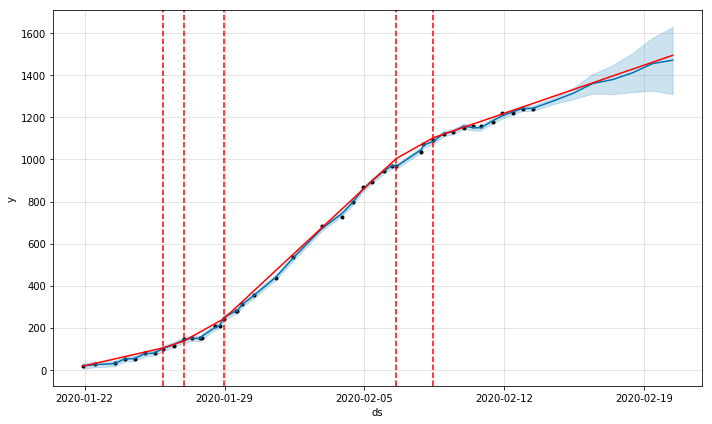

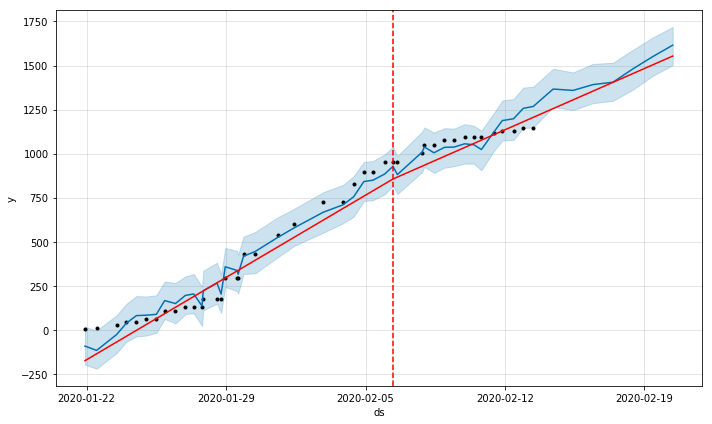

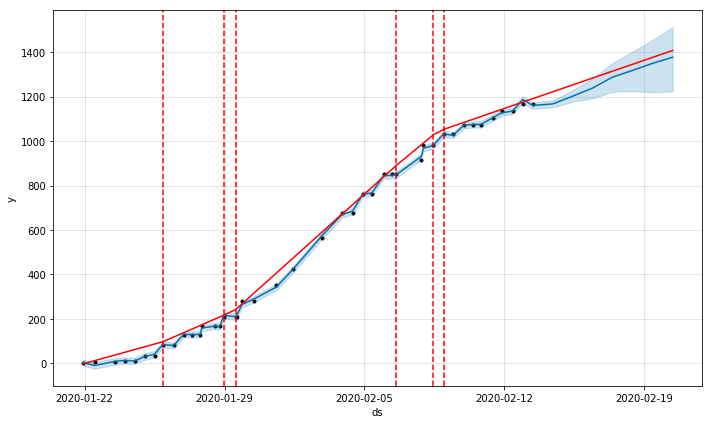

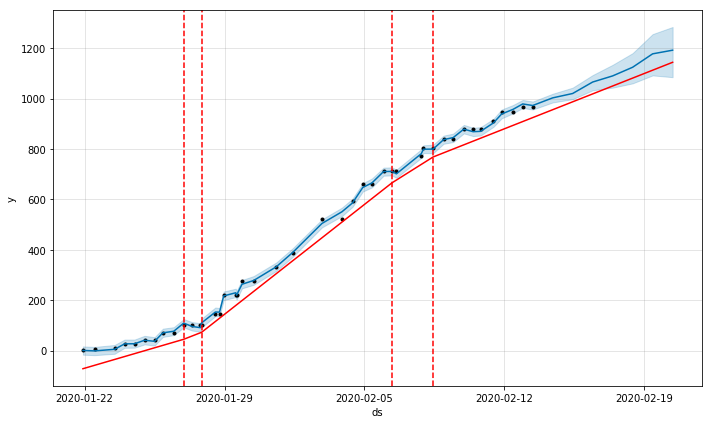

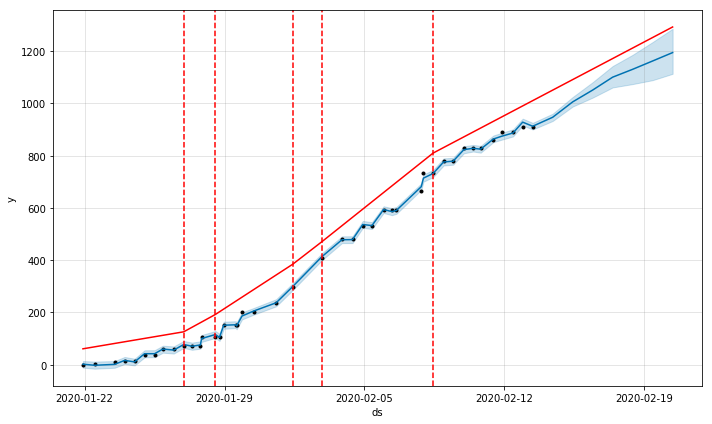

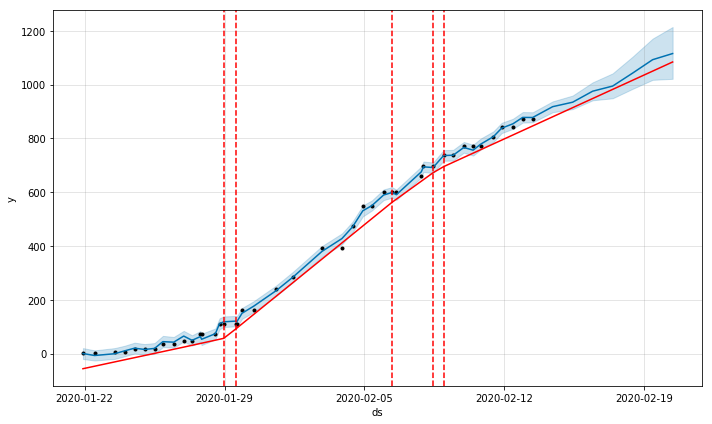

In [57]:
from fbprophet.plot import add_changepoints_to_plot





fig_Guangdong = gm_prophet_Guangdong.plot(forecast_Guangdong)
changepoints_Guangdong = add_changepoints_to_plot(fig_Guangdong.gca(), gm_prophet_Guangdong, forecast_Guangdong)


fig_Zhejiang = gm_prophet_Zhejiang.plot(forecast_Zhejiang)
changepoints_Zhejiang = add_changepoints_to_plot(fig_Zhejiang.gca(), gm_prophet_Zhejiang, forecast_Zhejiang)

fig_Henan = gm_prophet_Henan.plot(forecast_Henan)
changepoints_Henan = add_changepoints_to_plot(fig_Henan.gca(), gm_prophet_Henan, forecast_Henan)


fig_Hunan = gm_prophet_Hunan.plot(forecast_Hunan)
changepoints_Hunan = add_changepoints_to_plot(fig_Hunan.gca(), gm_prophet_Hunan, forecast_Hunan)


fig_Anhui = gm_prophet_Anhui.plot(forecast_Anhui)
changepoints_Anhui = add_changepoints_to_plot(fig_Anhui.gca(), gm_prophet_Anhui, forecast_Anhui)


fig_Jiangxi = gm_prophet_Jiangxi.plot(forecast_Jiangxi)
changepoints_Jiangxi = add_changepoints_to_plot(fig_Jiangxi.gca(), gm_prophet_Jiangxi, forecast_Jiangxi)

#### Comparing trajectory of new cases for various provinces (Mainland China)

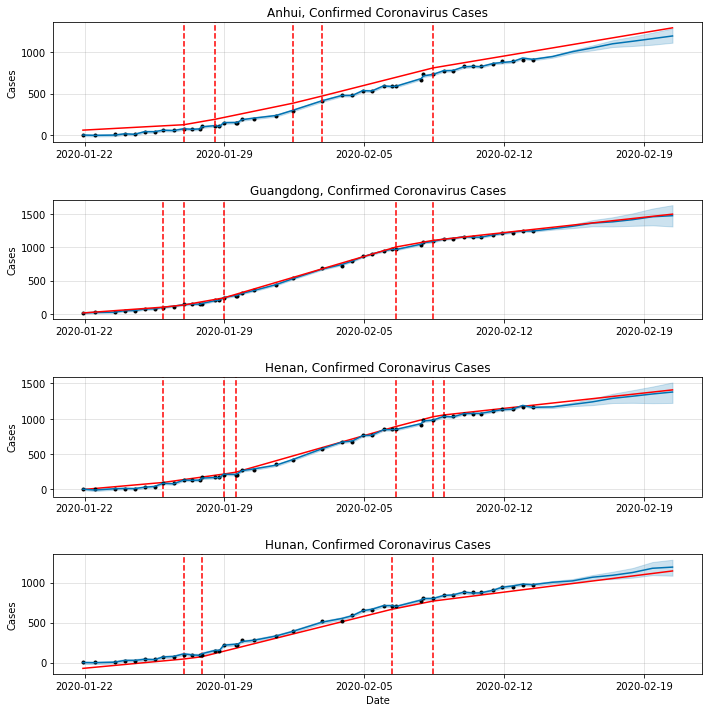

In [58]:

# plot major provinces showing similar change in trend (after redfinition of "infected")
#https://www.taiwannews.com.tw/en/news/3874490

fig = plt.figure(figsize=(10, 10))


ax1 = fig.add_subplot(4, 1, 1)
gm_prophet_Anhui.plot(forecast_Anhui, ax=ax1)
ax1.set_title('Anhui, Confirmed Coronavirus Cases')
changepoints = add_changepoints_to_plot(fig.gca(), gm_prophet_Anhui, forecast_Anhui)



ax2 = fig.add_subplot(4, 1, 2)
gm_prophet_Guangdong.plot(forecast_Guangdong, ax=ax2)
changepoints_Guangdong = add_changepoints_to_plot(fig.gca(), gm_prophet_Guangdong, forecast_Guangdong)
ax2.set_title('Guangdong, Confirmed Coronavirus Cases')

ax3 = fig.add_subplot(4, 1, 3)
changepoints_Henan = add_changepoints_to_plot(fig.gca(), gm_prophet_Henan, forecast_Henan)
gm_prophet_Henan.plot(forecast_Henan, ax=ax3)
ax3.set_title('Henan, Confirmed Coronavirus Cases')



ax4 = fig.add_subplot(4, 1, 4)
changepoints_Hunan = add_changepoints_to_plot(fig.gca(), gm_prophet_Hunan, forecast_Hunan)
gm_prophet_Hunan.plot(forecast_Hunan, ax=ax4)
ax4.set_title('Hunan, Confirmed Coronavirus Cases')




axes = fig.get_axes()
axes[0].set_xlabel('')
axes[0].set_ylabel('Cases')
axes[1].set_xlabel('')
axes[1].set_ylabel('Cases')
axes[2].set_xlabel('')
axes[2].set_ylabel('Cases')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Cases')

fig.savefig('temp.png', dpi=100)


Text(47.625,0.5,'Cases')

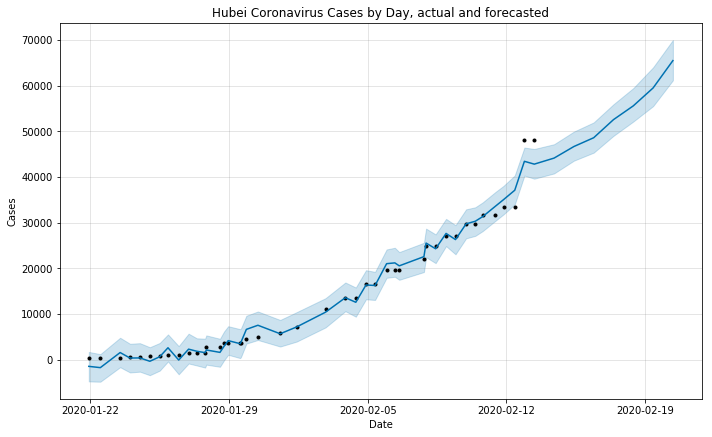

In [59]:
fig1 = gm_prophet.plot(forecast)
plt.title('Hubei Coronavirus Cases by Day, actual and forecasted');
axes = fig1.get_axes()
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cases')


Text(47.625,0.5,'Cases')

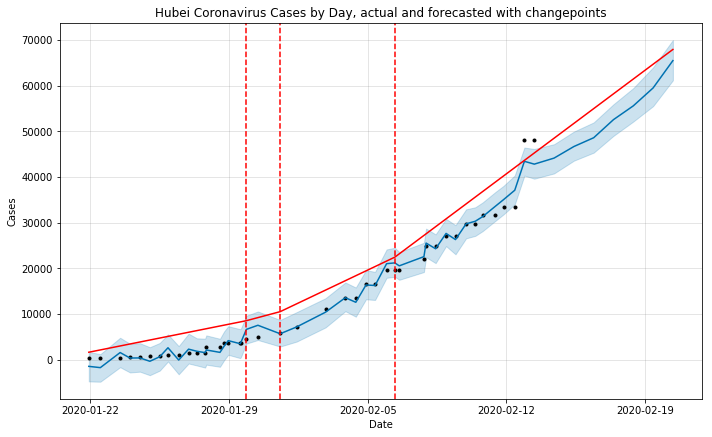

In [60]:
#added change points to forecast
from fbprophet.plot import add_changepoints_to_plot
fig2= gm_prophet.plot(forecast)
a = add_changepoints_to_plot(fig2.gca(), gm_prophet, forecast)
plt.title('Hubei Coronavirus Cases by Day, actual and forecasted with changepoints');
axes = fig2.get_axes()
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cases')



